<a href="https://colab.research.google.com/github/davidjosephale/davidjosephale.github.io/blob/main/Color_Coded_Zip_Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

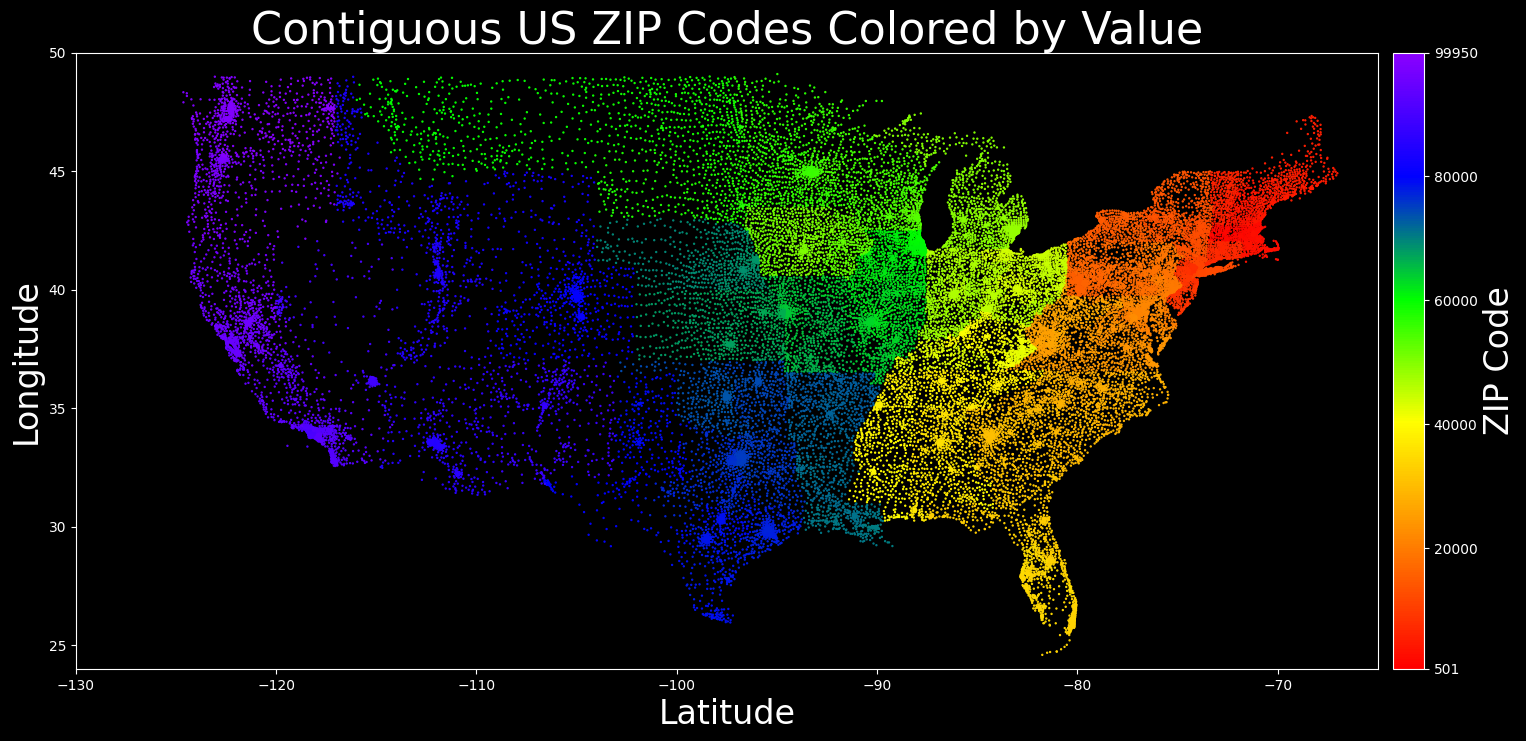

Lowest inhabitable ZIP in contiguous US:
zip               1001
lat           42.06262
lng          -72.62521
population     16136.0
density          551.7
Name: 137, dtype: object

Highest inhabitable ZIP in contiguous US:
zip               99403
lat            46.38114
lng          -117.25974
population      20483.0
density            55.1
Name: 33537, dtype: object


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.font_manager as fm
import urllib.request
import os

# upload csv with all zip codes (pulled from internet)
from google.colab import files
#uploaded = files.upload()
ziplist = pd.read_csv('uszips.csv')

# add new column for normalized zip codes
ziplist['zip_norm'] = ziplist['zip']/99950

# define color map with set intervals and smooth transitions
colors = ['#ff0000', '#ff7f00', '#ffff00', '#00ff00', '#0000ff', '#8b00ff']
cmap = mcolors.LinearSegmentedColormap.from_list("gradient", colors)
norm = mcolors.Normalize(vmin=501, vmax=99950)

# add new column for colors
ziplist['color'] = ziplist['zip_norm'].apply(cmap)

# initate the plot
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(20, 8))

# create scatter plot with zip codes
scatter = ax.scatter(ziplist['lng'], ziplist['lat'], color=ziplist['color'], s=0.5)

# creating a variant with dots proportional to population
popmax = ziplist['population'].max()
ziplist['pop_norm'] = ziplist['population']/popmax*5
#scatter = ax.scatter(ziplist['lng'], ziplist['lat'], color=ziplist['color'], s=ziplist['pop_norm']) #uncomment and comment above for this version

# labels and title
ax.set_xlabel('Latitude', fontsize=24)
ax.set_ylabel('Longitude', fontsize=24)
ax.set_xlim(-130,-65)
ax.set_ylim(24,50)
ax.set_title('Contiguous US ZIP Codes Colored by Value', fontsize=32)

# add colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, pad=0.01)
cbar.set_label('ZIP Code', fontsize=24)
cbar.set_ticks([501,20000,40000,60000,80000,99950])

plt.grid(False)
plt.show()


# Filter out non-contiguous US using rough bounding box
# Contiguous US approx: lat 24 to 50, long -125 to -66
contiguous = ziplist[
    (ziplist['population'] > 0) &
    (ziplist['density'] > 0) &
    (ziplist['lat'] >= 24) & (ziplist['lat'] <= 50) &
    (ziplist['lng'] >= -125) & (ziplist['lng'] <= -66)
]

# Get the ZIP code with the lowest value
lowest_zip = contiguous.loc[contiguous['zip'].idxmin()]

# Get the ZIP code with the highest value
highest_zip = contiguous.loc[contiguous['zip'].idxmax()]

# Print results
print("Lowest inhabitable ZIP in contiguous US:")
print(lowest_zip[['zip', 'lat', 'lng', 'population', 'density']])

print("\nHighest inhabitable ZIP in contiguous US:")
print(highest_zip[['zip', 'lat', 'lng', 'population', 'density']])
